<a href="https://colab.research.google.com/github/sankalp120/machinelearning/blob/main/mllab_27jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Use the 'raw' URL to access the actual data
url = 'https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv'
df = pd.read_csv(url)

print(f"Original shape: {df.shape}")
df.head()

Original shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
df_cleaned = df.dropna()
cleaned_shape = df_cleaned.shape
print(f"Cleaned shape: {cleaned_shape}")

Cleaned shape: (1000, 8)


In [ ]:
print(df.dtypes)
df.info()

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes:

In [ ]:
df['gender'] = df['gender'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test preparation course'] = df['test preparation course'].astype('category')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df = df.rename(columns = {
    'test preparation course' : 'test course',
    'race/ethnicity' : 'group',
    'parental level of education' : 'parents education'
})
df.head()

,gender,group,parents education,lunch,test course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df = df.replace({
    'gender': {'female': 'f', 'male': 'm'},
    'lunch': {'free/reduced': 'free-reduced'} # Standardizing a slash character
})
df.head()

/tmp/ipython-input-3336093927.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace({


,gender,group,parents education,lunch,test course,math score,reading score,writing score
0,f,group B,bachelor's degree,standard,none,72,72,74
1,f,group C,some college,standard,completed,69,90,88
2,f,group B,master's degree,standard,none,90,95,93
3,m,group A,associate's degree,free-reduced,none,47,57,44
4,m,group C,some college,standard,none,76,78,75


In [ ]:

print(df['gender'].unique())
print(df['gender'].value_counts())
print(df['math score'].describe())
print(df[df['math score'] > 100])
print(df[df['math score'] < 0])

['f', 'm']
Categories (2, object): ['f', 'm']
gender
f    518
m    482
Name: count, dtype: int64
count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64
Empty DataFrame
Columns: [gender, group, parents education, lunch, test course, math score, reading score, writing score]
Index: []
Empty DataFrame
Columns: [gender, group, parents education, lunch, test course, math score, reading score, writing score]
Index: []


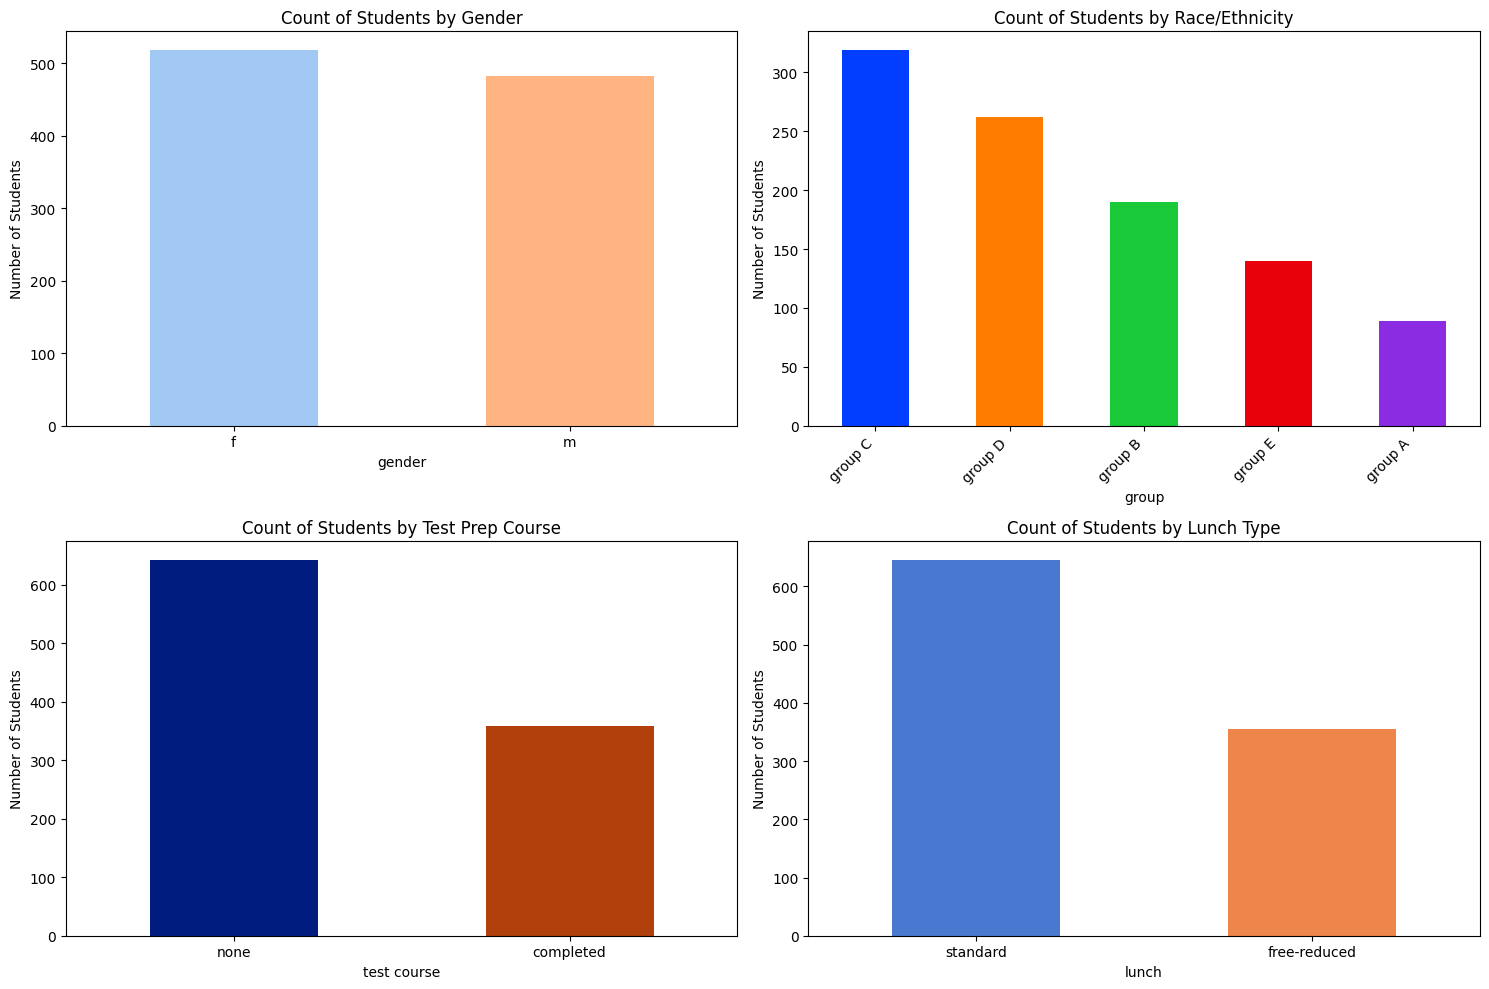

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Often used for better color palettes

# Set up the figure and axes for a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Gender
df['gender'].value_counts().plot(kind='bar', ax=axes[0, 0], color=sns.color_palette("pastel"))
axes[0, 0].set_title('Count of Students by Gender')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot 2: Race/Ethnicity (Group/Race)
df['group'].value_counts().plot(kind='bar', ax=axes[0, 1], color=sns.color_palette("bright"))
axes[0, 1].set_title('Count of Students by Race/Ethnicity')
axes[0, 1].set_ylabel('Number of Students')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Test Preparation Course
df['test course'].value_counts().plot(kind='bar', ax=axes[1, 0], color=sns.color_palette("dark"))
axes[1, 0].set_title('Count of Students by Test Prep Course')
axes[1, 0].set_ylabel('Number of Students')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot 4: Lunch
df['lunch'].value_counts().plot(kind='bar', ax=axes[1, 1], color=sns.color_palette("muted"))
axes[1, 1].set_title('Count of Students by Lunch Type')
axes[1, 1].set_ylabel('Number of Students')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()

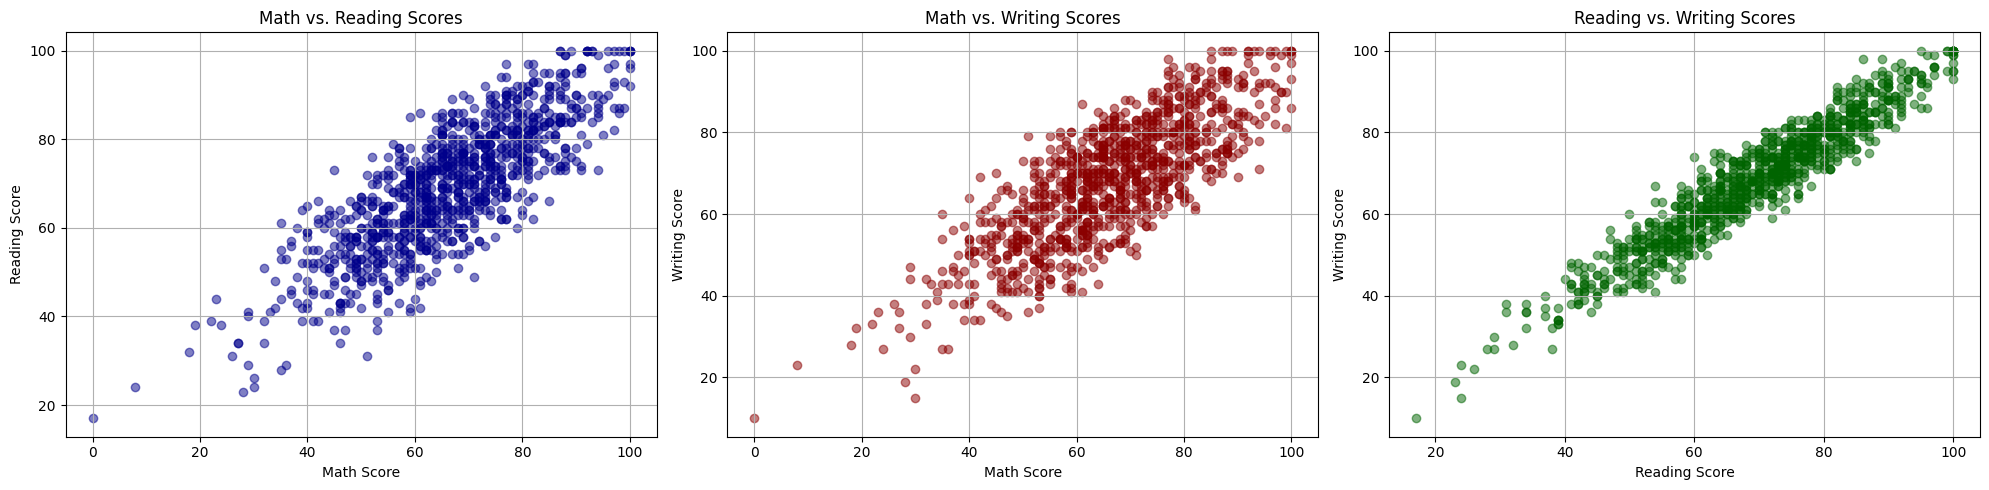

In [ ]:
import matplotlib.pyplot as plt

# Define the three score columns
scores = ['math score', 'reading score', 'writing score']

# Create a figure and a set of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: Math vs. Reading
axes[0].scatter(df[scores[0]], df[scores[1]], alpha=0.5, color='darkblue')
axes[0].set_title('Math vs. Reading Scores')
axes[0].set_xlabel('Math Score')
axes[0].set_ylabel('Reading Score')
axes[0].grid(True)

# Plot 2: Math vs. Writing
axes[1].scatter(df[scores[0]], df[scores[2]], alpha=0.5, color='darkred')
axes[1].set_title('Math vs. Writing Scores')
axes[1].set_xlabel('Math Score')
axes[1].set_ylabel('Writing Score')
axes[1].grid(True)

# Plot 3: Reading vs. Writing
axes[2].scatter(df[scores[1]], df[scores[2]], alpha=0.5, color='darkgreen')
axes[2].set_title('Reading vs. Writing Scores')
axes[2].set_xlabel('Reading Score')
axes[2].set_ylabel('Writing Score')
axes[2].grid(True)

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

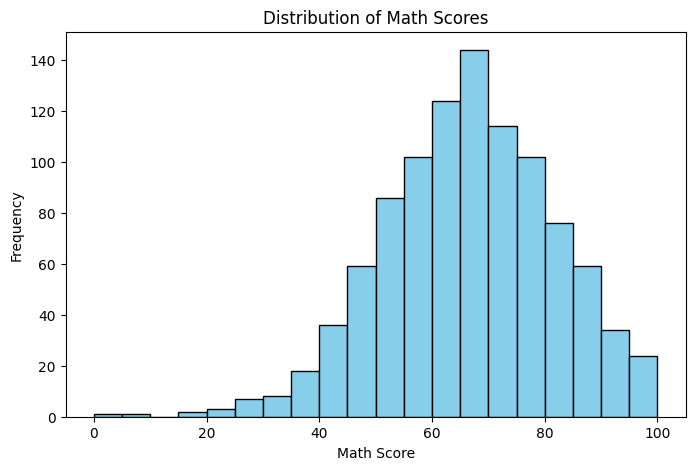

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['math score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
quartiles = df[['math score', 'reading score', 'writing score']].quantile([0.25, 0.5, 0.75])
print("-" * 30)
print("Quartiles:")
print(quartiles)

------------------------------
Quartiles:
      math score  reading score  writing score
0.25        57.0           59.0          57.75
0.50        66.0           70.0          69.00
0.75        77.0           79.0          79.00


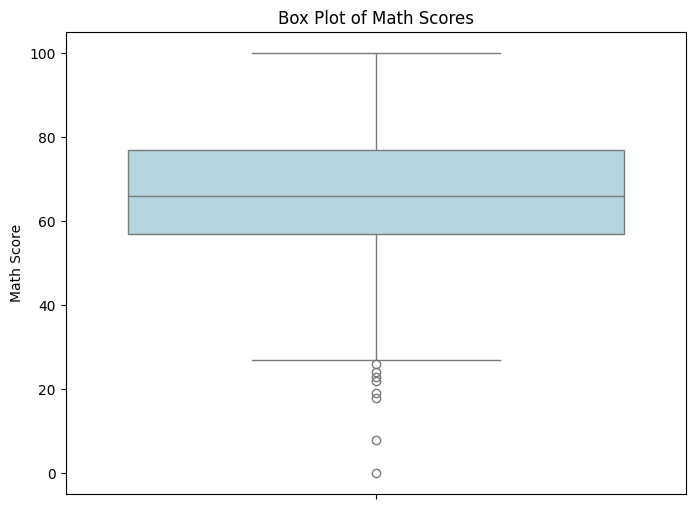

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['math score'], color='lightblue')
plt.title('Box Plot of Math Scores')
plt.ylabel('Math Score')
plt.show()

In [ ]:
std_dev = df[['math score', 'reading score', 'writing score']].std()
print("Standard Deviations:")
print(std_dev)

print("-" * 30)

# Variance (the average of the squared differences from the Mean)
variance = df[['math score', 'reading score', 'writing score']].var()
print("Variances:")
print(variance)

Standard Deviations:
math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64
------------------------------
Variances:
math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64


In [ ]:
score_range = df[['math score', 'reading score', 'writing score']].max() - df[['math score', 'reading score', 'writing score']].min()
print("-" * 30)
print("Ranges:")
print(score_range)

------------------------------
Ranges:
math score       100
reading score     83
writing score     90
dtype: int64


In [ ]:
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
print("-" * 30)
print("Correlation Coefficients Matrix:")
print(correlation_matrix)

------------------------------
Correlation Coefficients Matrix:
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [ ]:
covariance_matrix = df[['math score', 'reading score', 'writing score']].cov()
print("-" * 30)
print("Covariance Matrix:")
print(covariance_matrix)

------------------------------
Covariance Matrix:
               math score  reading score  writing score
math score     229.918998     180.998958     184.939133
reading score  180.998958     213.165605     211.786661
writing score  184.939133     211.786661     230.907992
